In [ ]:
##acquiring data

In [30]:
import pandas as pd
df = pd.read_excel(r'C:\Users\DELL\Downloads\Action.xlsx', sheet_name='Top Movies')
movie_list = df['Movie Name'].tolist()

In [31]:
#data preprocessing

In [38]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import re

def remove_special_characters(text):
    # Keep only letters and spaces
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text
df['Cleaned Story'] = df['Stroy'].apply(remove_special_characters)


In [40]:
df['Cleaned Story'] = df['Cleaned Story'].str.lower()


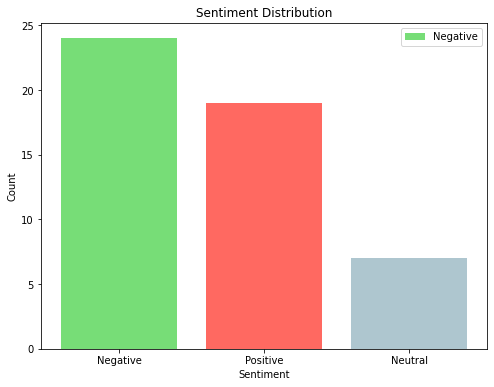

In [42]:
##sentimental analysis

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Assuming 'story' is a column containing movie stories
df['Sentiment Score'] = df['Cleaned Story'].apply(get_sentiment)

# Optionally categorize sentiments
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment Score'].apply(categorize_sentiment)









# Optionally, you can also visualize the results
#import matplotlib.pyplot as plt

#df['Sentiment'].value_counts().plot(kind='bar')
#plt.title('Sentiment Distribution')
#plt.xlabel('Sentiment')
#plt.ylabel('Count')
#plt.show()



##visualization 
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment'].value_counts()
colors = ['#77dd77', '#ff6961', '#aec6cf']
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts, color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(sentiment_counts.index, loc='upper right')
plt.show()

